#reading the dataset 

In [24]:
import pandas as pd 
sales_df=pd.read_csv(r"C:\Users\HP\Downloads\superstore_sales.csv")

In [25]:
sales_df.head()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,City,State,Region,Product Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,ORD10000,2023-01-01 00:00:00,2023-01-03 00:00:00,CUST202,Customer 0,Home Office,New York,TX,East,Office Supplies,Chairs,Product 0,496.74,1,0.21,29.81
1,ORD10001,2023-01-01 01:00:00,2023-01-03 01:00:00,CUST535,Customer 1,Corporate,Chicago,TX,East,Technology,Tables,Product 1,215.69,1,0.36,28.81
2,ORD10002,2023-01-01 02:00:00,2023-01-03 02:00:00,CUST960,Customer 2,Consumer,Chicago,TX,West,Furniture,Binders,Product 2,273.07,9,0.45,-22.71
3,ORD10003,2023-01-01 03:00:00,2023-01-03 03:00:00,CUST370,Customer 3,Consumer,Los Angeles,NY,South,Furniture,Binders,Product 3,404.94,8,0.42,132.39
4,ORD10004,2023-01-01 04:00:00,2023-01-03 04:00:00,CUST206,Customer 4,Consumer,San Francisco,IL,East,Furniture,Chairs,Product 4,480.63,9,0.26,-15.96


In [26]:
sales_df.tail()

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,City,State,Region,Product Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4995,ORD14995,2023-07-28 03:00:00,2023-07-30 03:00:00,CUST504,Customer 4995,Consumer,Los Angeles,CA,East,Furniture,Accessories,Product 4995,460.92,4,0.41,87.12
4996,ORD14996,2023-07-28 04:00:00,2023-07-30 04:00:00,CUST561,Customer 4996,Home Office,San Francisco,TX,West,Technology,Phones,Product 4996,278.46,6,0.47,174.69
4997,ORD14997,2023-07-28 05:00:00,2023-07-30 05:00:00,CUST231,Customer 4997,Corporate,New York,CA,South,Office Supplies,Phones,Product 4997,292.11,9,0.40,122.06
4998,ORD14998,2023-07-28 06:00:00,2023-07-30 06:00:00,CUST890,Customer 4998,Corporate,Houston,CA,West,Technology,Accessories,Product 4998,163.15,3,0.44,-16.05
4999,ORD14999,2023-07-28 07:00:00,2023-07-30 07:00:00,CUST973,Customer 4999,Corporate,Los Angeles,TX,Central,Technology,Binders,Product 4999,479.55,4,0.10,-20.98


In [27]:
sales_df.shape

(5000, 16)

In [28]:
sales_df.info

<bound method DataFrame.info of       Order ID           Order Date            Ship Date Customer ID  \
0     ORD10000  2023-01-01 00:00:00  2023-01-03 00:00:00     CUST202   
1     ORD10001  2023-01-01 01:00:00  2023-01-03 01:00:00     CUST535   
2     ORD10002  2023-01-01 02:00:00  2023-01-03 02:00:00     CUST960   
3     ORD10003  2023-01-01 03:00:00  2023-01-03 03:00:00     CUST370   
4     ORD10004  2023-01-01 04:00:00  2023-01-03 04:00:00     CUST206   
...        ...                  ...                  ...         ...   
4995  ORD14995  2023-07-28 03:00:00  2023-07-30 03:00:00     CUST504   
4996  ORD14996  2023-07-28 04:00:00  2023-07-30 04:00:00     CUST561   
4997  ORD14997  2023-07-28 05:00:00  2023-07-30 05:00:00     CUST231   
4998  ORD14998  2023-07-28 06:00:00  2023-07-30 06:00:00     CUST890   
4999  ORD14999  2023-07-28 07:00:00  2023-07-30 07:00:00     CUST973   

      Customer Name      Segment           City State   Region  \
0        Customer 0  Home Office     

In [29]:
sales_df.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Region              0
Product Category    0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
dtype: int64

In [31]:
sales_df[sales_df.duplicated(keep='first')]

,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,City,State,Region,Product Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [ ]:
print(sales_df.duplicated().sum())


0


Data types of every column

In [33]:
sales_df.dtypes

Order ID             object
Order Date           object
Ship Date            object
Customer ID          object
Customer Name        object
Segment              object
City                 object
State                object
Region               object
Product Category     object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Discount            float64
Profit              float64
dtype: object

Converting all the date colums into date format

In [34]:
sales_df['Order Date']=pd.to_datetime(sales_df['Order Date'])
sales_df['Ship Date']=pd.to_datetime(sales_df['Ship Date'])

In [38]:
#create separate columns for month,year and quarter
sales_df['month']=sales_df['Order Date'].dt.month
sales_df['quarter']=sales_df['Order Date'].dt.to_period('Q')
sales_df['year']=sales_df['Order Date'].dt.year

In [41]:
#analyse sales trend
mon_sales=sales_df.groupby('month')['Sales'].sum().reset_index()
print(mon_sales)
year_sales=sales_df.groupby('year')['Sales'].sum().reset_index()
print(year_sales)
quarter_sales=sales_df.groupby('quarter')['Sales'].sum().reset_index()
print(quarter_sales)

   month      Sales
0      1  182717.07
1      2  174166.42
2      3  195344.15
3      4  180518.76
4      5  187779.84
5      6  182705.37
6      7  170098.06
   year       Sales
0  2023  1273329.67
  quarter      Sales
0  2023Q1  552227.64
1  2023Q2  551003.97
2  2023Q3  170098.06


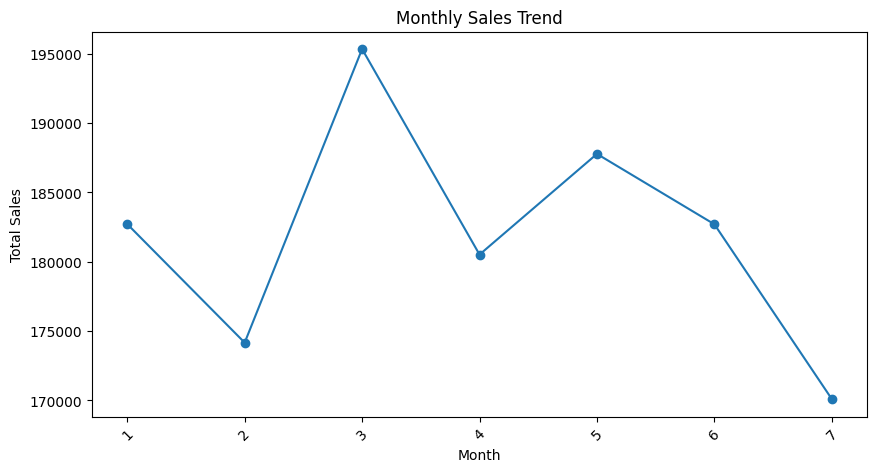

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(mon_sales['month'].astype(str), mon_sales['Sales'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.show()


In [ ]:
#analyzing which city doesnt perform well in march
march_sales = sales_df[sales_df['Order Date'].dt.month == 3].groupby(sales_df['City'])['Sales'].sum().sort_values()
print(march_sales)


City
Houston          33584.76
Los Angeles      35956.72
New York         40262.49
Chicago          42393.33
San Francisco    43146.85
Name: Sales, dtype: float64


In [ ]:
#analyzing which is performing bad and good in houston
houston_category_sales = sales_df[sales_df['City'] == 'Houston'].groupby('Product Category')['Sales'].sum().sort_values()
print(houston_category_sales)


Product Category
Furniture          81925.88
Technology         86639.94
Office Supplies    87038.46
Name: Sales, dtype: float64


In [ ]:
#nalysing whether discounts has any impact on sales in houston
houston_discount_sales = sales_df[
    (sales_df['City'] == 'Houston') & (sales_df['Product Category'] == 'Furniture')
].groupby('Discount')['Sales'].sum().sort_values()

print(houston_discount_sales)


Discount
0.19     306.49
0.26     383.50
0.23     388.20
0.14     530.39
0.06     562.73
0.02     700.86
0.40     727.52
0.47     786.05
0.17     858.34
0.03     878.55
0.33     887.26
0.32     926.50
0.22     943.87
0.30     967.63
0.18    1011.46
0.37    1089.03
0.00    1287.65
0.35    1294.17
0.29    1301.66
0.24    1348.96
0.21    1392.66
0.28    1614.57
0.48    1616.97
0.31    1627.35
0.43    1628.84
0.27    1709.22
0.10    1736.87
0.08    1741.16
0.12    1795.10
0.41    1820.62
0.45    1861.80
0.44    1863.10
0.38    1930.44
0.39    1979.95
0.50    1998.99
0.11    2023.33
0.49    2063.65
0.20    2144.29
0.42    2181.52
0.04    2197.38
0.15    2205.33
0.01    2208.58
0.25    2291.01
0.05    2429.57
0.16    2434.89
0.09    2508.82
0.46    2542.96
0.36    2591.15
0.07    2663.34
0.13    2731.25
0.34    3210.35
Name: Sales, dtype: float64


In [ ]:
#analysing which segment has the lowest Sales
houston_segment_sales = sales_df[sales_df['City'] == 'Houston'].groupby('Segment')['Sales'].sum().sort_values()
print(houston_segment_sales)


Segment
Consumer       70667.62
Home Office    85940.17
Corporate      98996.49
Name: Sales, dtype: float64


In [58]:
sales_df['Shipping Time'] = (sales_df['Ship Date'] - sales_df['Order Date']).dt.days
houston_shipping = sales_df[sales_df['City'] == 'Houston'].groupby('Shipping Time')['Sales'].sum().sort_index()
print(houston_shipping)


Shipping Time
2    255604.28
Name: Sales, dtype: float64


In [63]:
sales_df[sales_df.duplicated(subset=['Region', 'Product Category'], keep=False)]


,Order ID,Order Date,Ship Date,Customer ID,Customer Name,Segment,City,State,Region,Product Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,quarter,year,Shipping Time
0,ORD10000,2023-01-01 00:00:00,2023-01-03 00:00:00,CUST202,Customer 0,Home Office,New York,TX,East,Office Supplies,Chairs,Product 0,496.74,1,0.21,29.81,1,2023Q1,2023,2
1,ORD10001,2023-01-01 01:00:00,2023-01-03 01:00:00,CUST535,Customer 1,Corporate,Chicago,TX,East,Technology,Tables,Product 1,215.69,1,0.36,28.81,1,2023Q1,2023,2
2,ORD10002,2023-01-01 02:00:00,2023-01-03 02:00:00,CUST960,Customer 2,Consumer,Chicago,TX,West,Furniture,Binders,Product 2,273.07,9,0.45,-22.71,1,2023Q1,2023,2
3,ORD10003,2023-01-01 03:00:00,2023-01-03 03:00:00,CUST370,Customer 3,Consumer,Los Angeles,NY,South,Furniture,Binders,Product 3,404.94,8,0.42,132.39,1,2023Q1,2023,2
4,ORD10004,2023-01-01 04:00:00,2023-01-03 04:00:00,CUST206,Customer 4,Consumer,San Francisco,IL,East,Furniture,Chairs,Product 4,480.63,9,0.26,-15.96,1,2023Q1,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD14995,2023-07-28 03:00:00,2023-07-30 03:00:00,CUST504,Customer 4995,Consumer,Los Angeles,CA,East,Furniture,Accessories,Product 4995,460.92,4,0.41,87.12,7,2023Q3,2023,2
4996,ORD14996,2023-07-28 04:00:00,2023-07-30 04:00:00,CUST561,Customer 4996,Home Office,San Francisco,TX,West,Technology,Phones,Product 4996,278.46,6,0.47,174.69,7,2023Q3,2023,2
4997,ORD14997,2023-07-28 05:00:00,2023-07-30 05:00:00,CUST231,Customer 4997,Corporate,New York,CA,South,Office Supplies,Phones,Product 4997,292.11,9,0.40,122.06,7,2023Q3,2023,2
4998,ORD14998,2023-07-28 06:00:00,2023-07-30 06:00:00,CUST890,Customer 4998,Corporate,Houston,CA,West,Technology,Accessories,Product 4998,163.15,3,0.44,-16.05,7,2023Q3,2023,2


In [ ]:
#Creating a pivot table for region wise
sales_df_pivot_table = sales_df.pivot_table(index='Region', columns='Product Category', values='Sales', aggfunc='sum')
print(sales_df_pivot_table)

Product Category  Furniture  Office Supplies  Technology
Region                                                  
Central           105059.24        110195.19   105028.99
East              107657.20        108143.51   106555.17
South             106857.25         97447.40   106603.96
West              111150.41        115885.64    92745.71


In [ ]:
#finding minmum and maximum sales by region
min_value = sales_df_pivot_table.min().min()  
max_value = sales_df_pivot_table.max().max()
print("Min Sales:", min_value)
print("Max Sales:", max_value)

Min Sales: 92745.71
Max Sales: 115885.64


In [71]:
#Adding Minimum and Maximum sales per Product Category and region
sales_df_pivot_table.loc['Min Sales'] =sales_df_pivot_table.min()  
sales_df_pivot_table.loc['Max Sales'] = sales_df_pivot_table.max()  
sales_df_pivot_table['Min Sales'] = sales_df_pivot_table.min(axis=1)  
sales_df_pivot_table['Max Sales'] = sales_df_pivot_table.max(axis=1)  


In [72]:
print(sales_df_pivot_table)

Product Category  Furniture  Office Supplies  Technology  Min Sales  Max Sales
Region                                                                        
Central           105059.24        110195.19   105028.99  105028.99  110195.19
East              107657.20        108143.51   106555.17  106555.17  108143.51
South             106857.25         97447.40   106603.96   97447.40  106857.25
West              111150.41        115885.64    92745.71   92745.71  115885.64
Min Sales         105059.24         97447.40    92745.71   92745.71  105059.24
Max Sales         111150.41        115885.64   106603.96  106603.96  115885.64


In [79]:
sales_df['rank_column'] = sales_df.groupby('Product Category')['Profit'].rank(ascending=False, method='dense')
sales_df = sales_df.sort_values(['Product Category', 'rank_column'])
print(sales_df[['Product Category','rank_column']])


     Product Category  rank_column
2022        Furniture          1.0
1636        Furniture          2.0
4575        Furniture          3.0
3968        Furniture          4.0
694         Furniture          5.0
...               ...          ...
335        Technology       1575.0
2390       Technology       1576.0
679        Technology       1577.0
3324       Technology       1577.0
4171       Technology       1578.0

[5000 rows x 2 columns]


In [80]:

category_profit = sales_df.groupby('Product Category')['Profit'].sum().reset_index()
category_profit['Category Rank'] = category_profit['Profit'].rank(ascending=False, method='dense')
print(category_profit[['Product Category', 'Category Rank']])


  Product Category  Category Rank
0        Furniture            3.0
1  Office Supplies            2.0
2       Technology            1.0


In [81]:
sales_with_category_rank = sales_df.merge(category_profit[['Product Category', 'Category Rank']], on='Product Category', how='left')

In [85]:
sub_category_profit=sales_with_category_rank.groupby('Sub-Category')['Profit'].sum().reset_index()
sub_category_profit['rank_by_sub_category']=sub_category_profit['Profit'].rank(ascending=False,method='dense')
print(sub_category_profit[['Sub-Category','rank_by_sub_category']])

  Sub-Category  rank_by_sub_category
0  Accessories                   1.0
1      Binders                   5.0
2       Chairs                   3.0
3       Phones                   2.0
4       Tables                   4.0


In [ ]:
#month wise sales difference
mon_sales['Previous_sales']=mon_sales['Sales'].shift(1)
mon_sales['Sales Change'] = mon_sales['Sales'] - mon_sales['Previous_sales']
print(mon_sales)

   month      Sales  Previous_sales  Sales Change
0      1  182717.07             NaN           NaN
1      2  174166.42       182717.07      -8550.65
2      3  195344.15       174166.42      21177.73
3      4  180518.76       195344.15     -14825.39
4      5  187779.84       180518.76       7261.08
5      6  182705.37       187779.84      -5074.47
6      7  170098.06       182705.37     -12607.31
